# What Sentiment Analysis Can Reveal About Common Speech Patterns

## Digital Humanities 140 Coding for Humanities with Professor Winjum at UCLA Winter 2022

#### 3/14/2022 | Crystal Huynh, Larry Qu, Nelson Truong

### Introduction
(an overview of your entire project, your research topic and question, your motivation to study this topic, and any prior related work) (will delete these directions later)

#### Project Overview
This project analyzes the sentiment of a movie reviews dataset using Python through Jupyter Notebooks. 

#### Research Question: What common speech patterns can be found in positive and negative commentary?
Our group wanted to explore how people tend to speak when talking in an extremely positive and negative manner, especially in the context of movie reviews. Are there specific words that are frequently used when speaking in a positive sentiment versus a negative one? How often do those words show up in speech? How polarizing are these frequently used words? Do people tend to speak more when they are feeling positive or negative about something? This is the first step that we want to take when analyzing the speech patterns of movie reviews.

#### Why It Matters
With this information, we can later see whether these patterns match typical human behavior/speech, or if they are more specific in an online, more anonymous environment. We can use our findings to potentially see how polarizing these spaces are and how they affect our society in the long run as this type of analysis can also be used on things like social media comments and news articles where commentary can be even more polarizing. As we explore speech patterns in settings outside of normal, in person conversation, we can get a better idea of how people truly think and feel in certain environments or how people will think and feel given what we already know. 

### Methods
(explain your data and your analytical process)

#### Data Source
[IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

[More Dataset Information](http://ai.stanford.edu/~amaas/data/sentiment/)

We are using the IMDB Dataset of 50K Movie Reviews Large Movie Review Dataset from kaggle which contains 50K movie reviews. This dataset can be used for binary sentiment classification as it contains highly polar positive and negative movie reviews for training and testing.

The dataset contains two columns, one which contains the movie review text and the other with its corresponding sentiment categorization of positive or negative. Both the review and sentiment columns are object data types which represent strings.

We also need to acknowledge the shortcomings of our dataset. Although there is not much information on where the reviews are from, we can assume the reviews cover multple movies. With that being said, we also do not know what time period these reviews are from, the criteria for being described as "highly polar", or the backgrounds of the people who made these reviews. The context in which these reviews were made would have provided more insight into common behavioral patterns.  

[Negative Words](https://gist.github.com/mkulakowski2/4289441)

[Positive Words](https://gist.github.com/mkulakowski2/4289437)

In order to indentify the positive and negative words, we can easily scan the web for premade datasets. These two shown above are datasets containing negative and positive words, respectively, that we can use to analyze our movie reviews with. These datasets may help us recognize whether a review is actually negative/positive based on the words used, the most common words used in a negative/positive statement, how the context matters when using negative/positive words, and other speech patterns.

#### Project Scope
The intended analysis is to see what are the common "positive" and "negative" words being used and how often they are used. The resulting visualizations for this would probably be something like a bar chart highlighting the ten most common "positive" and "negative" words and how often they appear in the dataset. We can also how long "positive" reviews are compared to "negative" reviews by checking the word count for each review and plotting the total word count frequency in a separate bar chart. Another analysis we could do is categorize common "positive" and "negative" words to see how polarizing they really are and plot this on another bar chart to visualize the scale of how positive "positive" reviews are and how negative "negative" reviews are.

#### Analytical Process
We will first start by exploring our dataset as a whole to better understand how we can utilize the data we have to answer our research question. We know that the dataset contains both positive and negative reviews, so we will also explore the positive and negative reviews separately. When looking at positive and negative reviews separately, we'll run code to calculate a sentiment score on each review to compare the score with the original sentiment categorization. We'll also conduct a word frequency analysis to see what kinds of words are bing used in a negative/positive context.

add more

#### Expected Insights
We expect to see more polarizing "positive" and "negative" reviews to be lengthier in word count as people tend to speak more than they are feeling extremely "positive" or "negative" which is typical in normal, everyday, real life behavior. However, many people tend to not show their true thoughts and feelings when speaking in public, so perhaps in spaces like movie reviews, people's wording may be more polarizing than if they were to be giving the review in person. In other words, their online, anonymous reviews may be a lot more emotional and biased than what people would typically say aloud. We might see that although online commentary may reflect human behavior in that it represents what people actually are thinking and feeling, it may not be representative of what people would normally say to others. However, organizations can use these findings to gauge a more truthful reaction from the public for their respective initiatives and campaigns to see what they need to improve upon in order to generate a positive response.

### Results 
(lay out your data exploration, your findings, and your visuals)

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import vader
nltk.download('vader_lexicon')
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Data Exploration

In this section, we will be taking a closer look into our dataset to better understand the information it provides and how we can utilize it in our analysis to answer our research question.

In [2]:
#turn the csv file into a dataframe
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# summary information about the dataframe
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
# how many reviews are labeled positive vs. negative
imdb_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#### Word Frequency

Now that we have a better idea of our dataset in that it contains reviews labeled as positive or negative and that there are an equal amount of each, we can separate the two and conduct more in depth exploratory analysis. By taking a closer look at the positive and negative reviews separately, we will be able to set the foundation for our formal analysis. Let's start by looking at word frequency.

In [5]:
#most common words used for positive and negative sentiments
#positiveReviews = []
#negativeReviews = []
positiveText = ""
negativeText = ""


for i in range(len(imdb_df['review'])):
    if imdb_df['sentiment'][i] == "positive":
        #positiveReviews.append(imdb_df['review'][i])
        positiveText += " " + imdb_df['review'][i]
    else:
        #negativeReviews.append(imdb_df['review'][i])
        negativeText += " " + imdb_df['review'][i]

#print(positiveReviews[:5])

#tokenize the words
sent = sent_tokenize(positiveText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in positive reviews")

freq = FreqDist(wordsNoStop)
for j in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(j,freq[j])
    
positiveFreq = freq

#tokenize the words
sent = sent_tokenize(negativeText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in negative reviews")

negfreq = FreqDist(wordsNoStop)
for j in sorted(negfreq, key=negfreq.get, reverse=True)[:30]:
    print(j,negfreq[j])
  
#onlyPositive = []
#for pword in freq:
#    if pword not in negfreq:
#        onlyPositive.append((pword, freq[pword]))
        
#onlyNegative = []
#for negword in negfreq:
#    if negword not in freq:
#        onlyNegative.append((negword, freq[negword]))
        
#onlyPositive.sort(key = lambda x: -1*x[1]) 
#onlyNegative.sort(key = lambda x: -1*x[1]) 

    
#print("30 most common words in positive reviews")
#print(onlyPositive[:30])

#print("30 most common words in negative reviews")
#print(onlyNegative[:30])

30 most common words in positive reviews
br 97952
's 63028
film 40162
movie 36180
'' 32033
`` 31520
n't 26486
one 23978
like 16425
good 13826
story 12112
great 11825
time 11623
see 11514
would 11099
really 10446
well 10036
also 9379
much 8777
even 8333
first 8297
people 8178
get 8029
... 7940
love 7771
best 7587
way 7467
films 7305
many 7089
life 7078
30 most common words in negative reviews
br 103996
's 58740
movie 47633
n't 39444
film 35779
`` 34504
'' 34060
one 23114
like 21246
would 15033
good 13756
bad 13415
even 13370
really 11821
... 11805
time 11324
could 11134
see 10351
get 9794
much 9678
story 9510
people 8907
make 8899
made 8346
movies 7798
plot 7696
acting 7659
way 7277
characters 7093
first 7060


So, what do these words tell us?

Here we found the 30 most common words used in positive reviews and the 30 most common words used in negative reviews. For both, we see that our code is counting "br', "'s", and "''" which aren't words and symbols that reveal anything of use to our research. We also see more neutral words like "movie" and "film" which provide context rather than reveal much about the sentiment of the review. This tells us that we'll need to do some cleaning before we can conduct a word frequency analysis that will be meaningful, i.e. if we want to find the top 10 most commonly used words in negative/positive reviews. 

If we ignore these "words", we can take a first look at the other, more meaningful words that were listed. For positive reviews, we can see words like "like", "good", "great", "love", and "best" which are commonly associated with positive statements. For negative reviews, we only really see "bad" as a word that is commonly associated with negative statements. Interestinly enough, most of the common words found in the negative reviews are words associated with the film itself like "plot", "story", "acting", and "characters" which may be an indication that reviews tends to be more critical in a constructive sense rather than an outburst of how horrible the film was.

Another thing we noticed with this initial word frequency analysis was that the code itself was taking a while to run because the dataset was too large. We originally thought the dataset would be a decent sized sample of reviews, but because of the long runtime, we did not want our analysis to get stuck on a particular cell of code. As a result, we decided to use a smaller sample from the dataset and extrapolate our findings at the end of our analysis. 

Expanding upon the previous section where we looked at the 30 most frequent words in positive and negative reviews, we tried to create data visualizations to better represent these differences, using a smaller and cleaner sample of reviews.

In [6]:
# Compile first 1000 reviews into one giant string
reviews = ""
for ind in range(1000):
    reviews = reviews + " " + imdb_df["review"][ind]
    
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(reviews.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,4124
1,'s,2349
2,movie,2056
3,film,1770
4,``,1285
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [7]:
# Purge weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df = df.drop(labels=26)
df

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [8]:
#view 30 most common words
df[:30]

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
10,time,543
11,character,532
12,would,528
13,see,528
14,good,524


Here we have cleaned our dataset so that meaningless letters and symbols will no longer be included in our word frequency analysis. We can run our previous code again to retrieve a better list of the most commonly used words in positive and negative reviews. 

In [9]:
#most common words used for positive and negative sentiments

#larry is there a way for us to run your code again using the cleaned wordlist nelson made?

In order to get a better gauge of the most frequently used words that will help with our sentiment analysis, we will also need to ignore words like "movie", "film", "characters", and "scene" that provide more context about the review and are common in both positive and negative reviews. Essentially, any words that are more neutral will not provide the information we need for our research. So, let's find the sentiment values of our most common words. Once we find the most positive and negative words, we can find the average positive/negative sentiment and compare our values.

In [10]:
# Sentiment value of each word
sia = vader.SentimentIntensityAnalyzer()
k = 0
words_sentiments = []
for index, row in df.iterrows():
    while k < 30:
        word = df["wordlist"].iloc[k]
        print(word + "'s compound polarity score is " + str(sia.polarity_scores(word)["compound"]))
        words_sentiments.append(sia.polarity_scores(word)["compound"])
        k+=1

movie's compound polarity score is 0.0
film's compound polarity score is 0.0
one's compound polarity score is 0.0
like's compound polarity score is 0.3612
get's compound polarity score is 0.0
time's compound polarity score is 0.0
character's compound polarity score is 0.0
would's compound polarity score is 0.0
see's compound polarity score is 0.0
good's compound polarity score is 0.4404
even's compound polarity score is 0.0
story's compound polarity score is 0.0
make's compound polarity score is 0.0
really's compound polarity score is 0.0
scene's compound polarity score is 0.0
much's compound polarity score is 0.0
well's compound polarity score is 0.2732
way's compound polarity score is 0.0
people's compound polarity score is 0.0
also's compound polarity score is 0.0
first's compound polarity score is 0.0
great's compound polarity score is 0.6249
bad's compound polarity score is -0.5423
made's compound polarity score is 0.0
think's compound polarity score is 0.0
could's compound polari

In [69]:
# Find the most polarizing words - negative and positive
#help
k = 0
positive_words = []
negative_words = []
posrange = np.arange(0.8, 1.0) 
negrange = np.arange(-0.1, -0.8)
for index, row in df.iterrows():
    while k < 50:
        word = df["wordlist"].iloc[k]
        if 0.8 < sia.polarity_scores(word)["compound"] <= 1.0:
            print(word + "'s compound polarity score is " + str(sia.polarity_scores(word)["compound"]))
            positive_words.append(sia.polarity_scores(word)["compound"])
        if -0.1 <= sia.polarity_scores(word)["compound"] < -0.8:
            print(word + "'s compound polarity score is " + str(sia.polarity_scores(word)["compound"]))
            negative_words.append(sia.polarity_scores(word)["compound"])
        k+=1

In [11]:
# Mean
df['wordfreq'].mean()

6.483727970591415

In [12]:
# which words have a word freq of 6 and 7
# is there a nicer way of doing this?
mean6 = df[df['wordfreq'] == 6] 
mean6[:10]

,wordlist,wordfreq
2821,security,6
2822,stare,6
2823,performed,6
2824,terribly,6
2825,grown,6
2826,love.,6
2827,meaningless,6
2828,mattei,6
2829,vivid,6
2830,loneliness,6


In [13]:
# which words have a word freq of 6 and 7
mean7 = df[df['wordfreq'] == 7] 
mean7[:10]

,wordlist,wordfreq
2543,sold,7
2544,johanson,7
2545,soap,7
2546,portrait,7
2547,connect,7
2548,connected,7
2549,noble,7
2550,davis,7
2551,quit,7
2552,mildly,7


In [14]:
# Median
df['wordfreq'].median()

1.0

In [15]:
# Mode
df['wordfreq'].mode()

0    1
dtype: int64

What do these values tell us?

The mean tells us that the word frequency value is on average 6.5, or since word frequency has to be a whole number, between 6 and 7. This means that the many of the words in this dataframe are used a total of 6-7 times which tells us that there are some words people tend to use more often in the context of movie reviews.

The median tells us the middle value for wordfrequency, and in this case it is 1.0. This tells us that we have a lot of words that are only used once throughtout the whole dataframe of reviews.

The mode is the most commonly seen word frequency value, and in this case, it is 1. This makes sense because of our median value that tells us there are a lot of words that only appear once. So, the median and the mode tell us that a word frequency of 1 is the most common word frequency value in our dataframe of common words. 

Now that we have a better understanding of our dataset, we can begin visualizing these initial exploration findings using plots.

<AxesSubplot:ylabel='Frequency'>

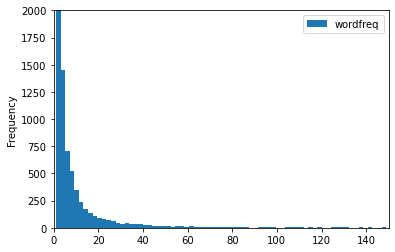

In [16]:
# Histogram
df.plot.hist(bins=1000, xlim=(0, 150), ylim=(0,2000))

This histogram shows the distribution of word frequency values, and we can see that most words are used less than 20 times and only a few words are used hundreds of times.

<AxesSubplot:ylabel='wordlist'>

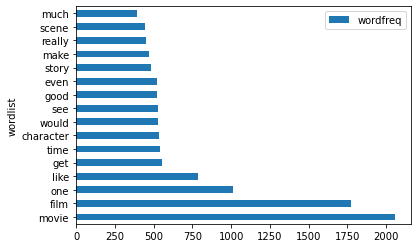

In [12]:
# Barchart of the 17 most frequent words
bar_df = df.loc[0:20, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")
#ax = bar_df.plot.bar(x='wordlist', y='wordfreq', rot=0)

We can also use a bar chart to visually compare how many times the most common words are being used in our dataset. Again, very few words are in the thousands in terms of word frequency value. This chart only shows the 17 most frequent words, and most of them are used around 500 times. Comparing this chart with the histogram allows us to understand that most of the words in our dataset are not used hundreds of times. rewrite this i dont like it

<AxesSubplot:ylabel='wordlist'>

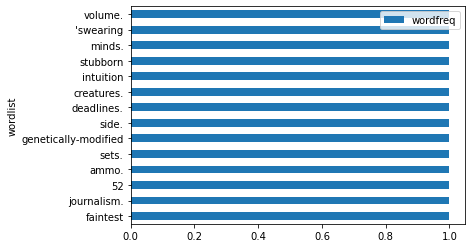

In [17]:
# Barchart of the 19 least frequent words
#this barchart isnt as helpful, should replace with something else
bar_df = df.loc[18490:, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")

# need to find all words with only a freq of 1

since there are a lot of words that only appear once, we can list them all out here:

In [15]:
df.loc[df['wordfreq'] == 1]

,wordlist,wordfreq
8816,timid,1
8817,penitentary,1
8818,emerald,1
8819,inwards,1
8820,privacy,1
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [21]:
df.loc[df['wordfreq'] < 5]

,wordlist,wordfreq
3853,me.,4
3854,hearted,4
3855,experimental,4
3856,em,4
3857,muslim,4
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


##### Positive Reviews
fluff about next section on positive reviews

In [22]:
# Look only at the first 1000 positive reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "positive":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,9788
1,'s,6235
2,film,4601
3,movie,4401
4,'',2898
...,...,...
30944,code-breakers,1
30945,bletchly,1
30946,emerged,1
30947,makers.,1


In [23]:
# Clean up the dataframe and remove weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=7)
df

,wordlist,wordfreq
2,film,4601
3,movie,4401
6,one,2718
8,like,1701
9,time,1448
...,...,...
30944,code-breakers,1
30945,bletchly,1
30946,emerged,1
30947,makers.,1


fluff

<AxesSubplot:ylabel='wordlist'>

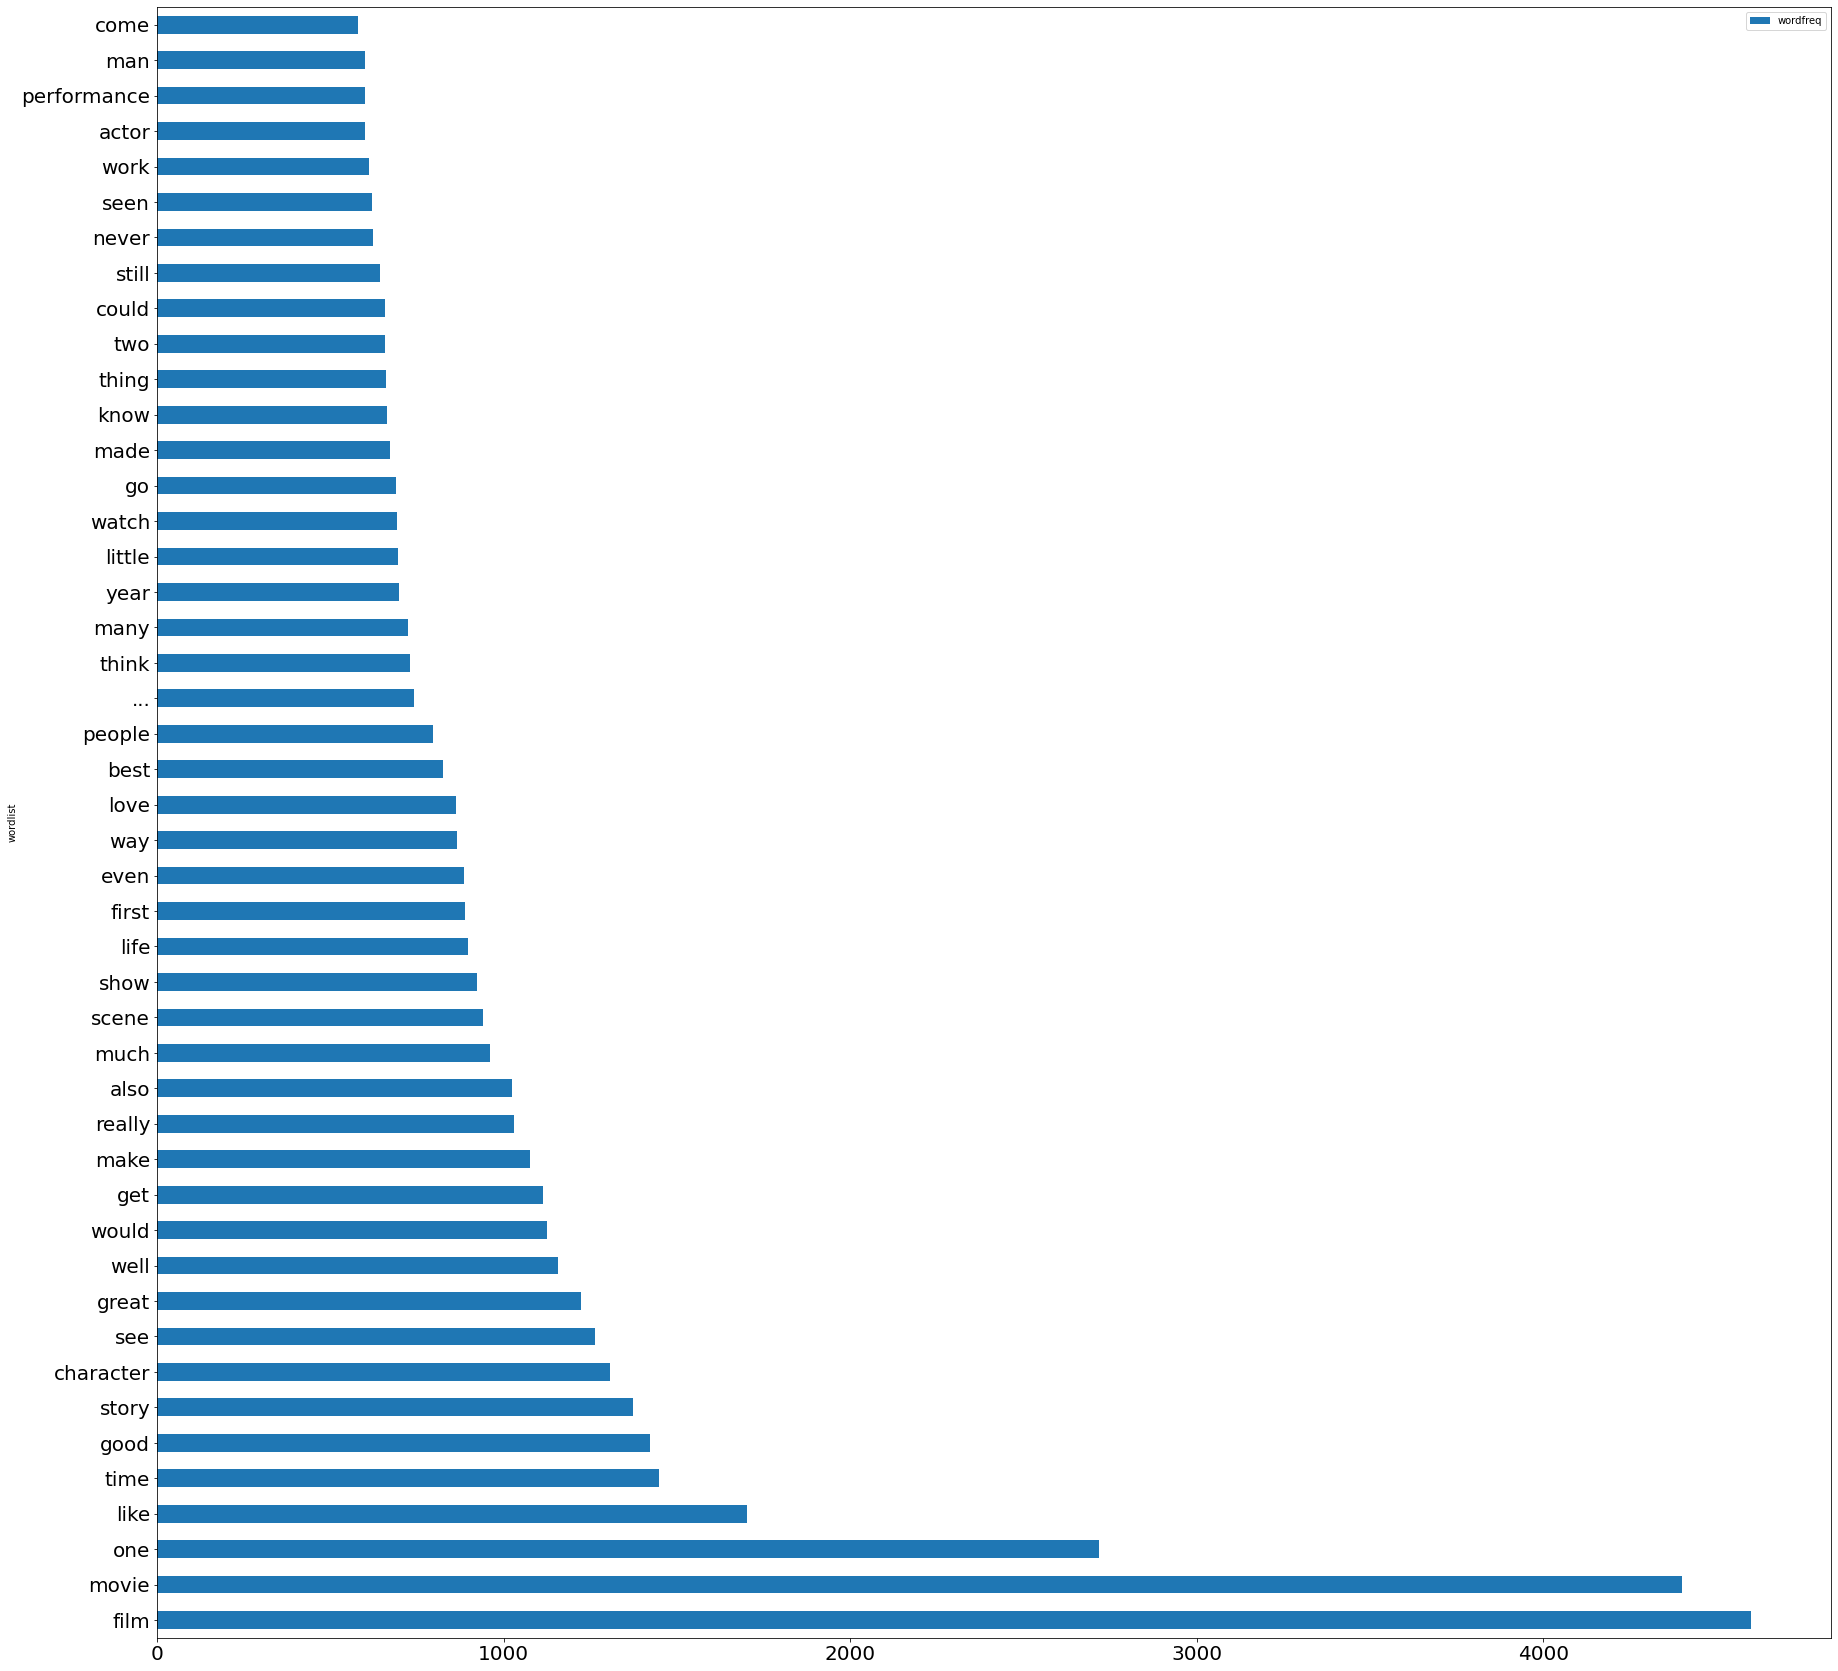

In [24]:
# Barchart
bar_df = df.loc[0:50, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

analysis fluff

##### Negative Reviews
fluff about next section on negative words

In [25]:
# Look only at the negative reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "negative":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,10836
1,'s,5831
2,movie,5726
3,film,4334
4,n't,4076
...,...,...
29968,extracted,1
29969,brutalizing,1
29970,unscarred,1
29971,mastroianni-movie,1


In [26]:
# Clean up dataframe and drop weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df

,wordlist,wordfreq
2,movie,5726
3,film,4334
7,one,2584
8,like,2291
9,even,1606
...,...,...
29968,extracted,1
29969,brutalizing,1
29970,unscarred,1
29971,mastroianni-movie,1


what do these words tell us?

<AxesSubplot:ylabel='wordlist'>

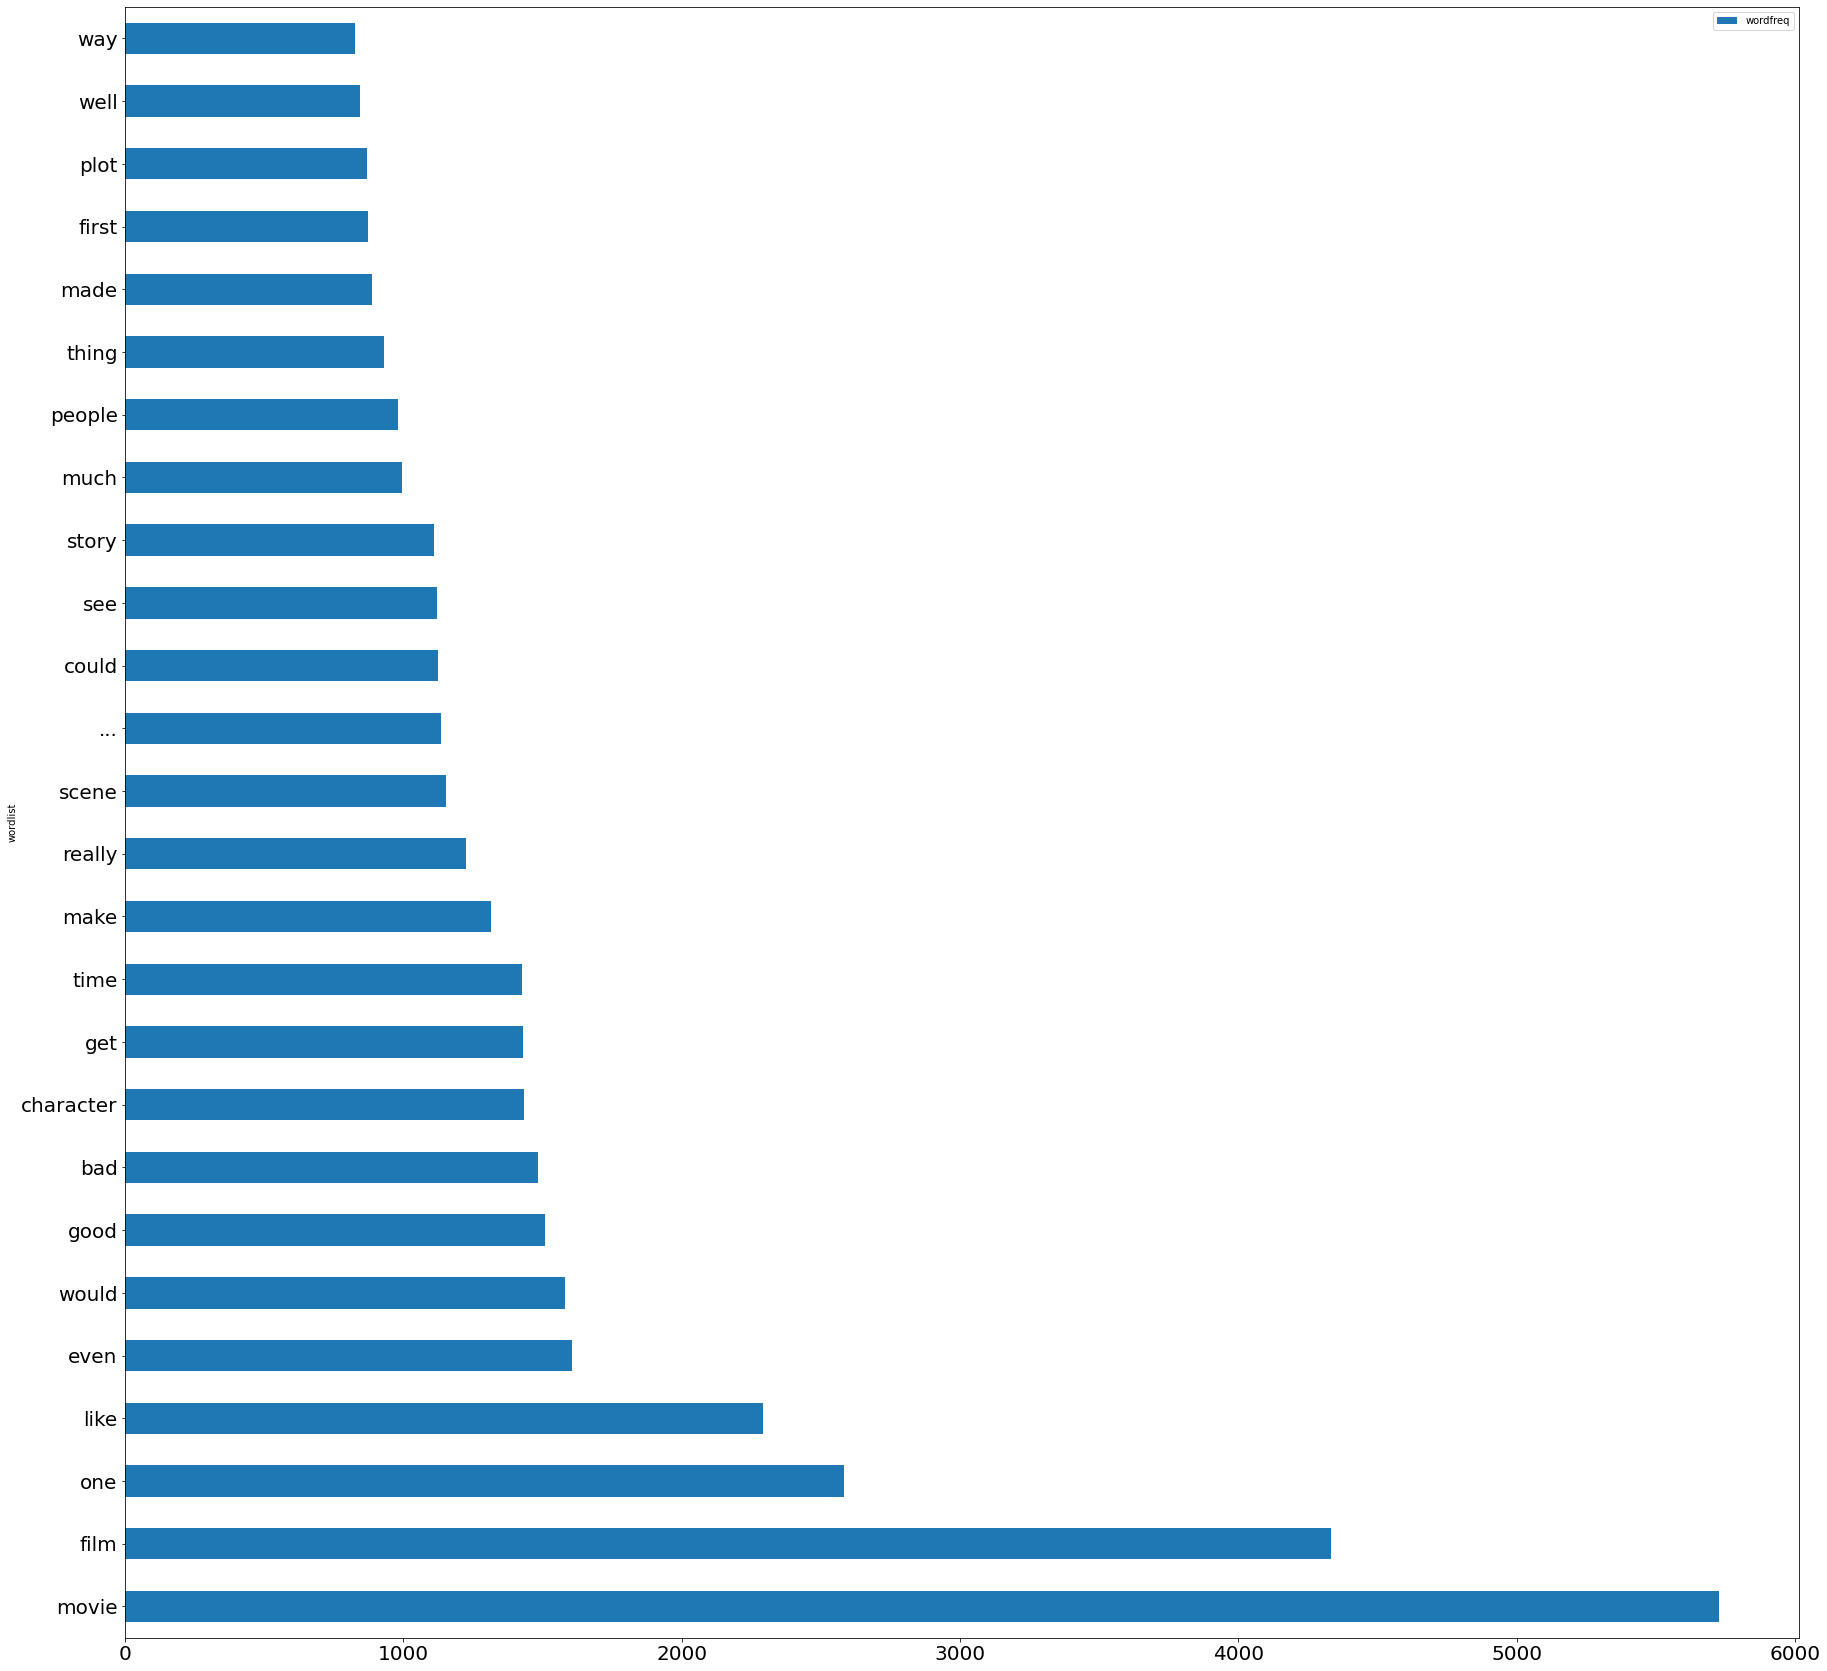

In [27]:
# Barchart
bar_df = df.loc[0:30, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

analysis fluff

We can see that in the reviews with negative sentiment, they are using very succinct words such as good or bad. This is probably due to the fact that the reviewer didn't like the movie so they don't want to waste time writing an indepth review about the movie. However, you look at the most frequent words for reviews with positive sentiment and you can see similar succint words. It turns out succinct words are just positive in general but the positive sentiment reviews includes more synonomous with good such as great or love.

#### Data Analysis

fluff stuffs

In [9]:
sia = vader.SentimentIntensityAnalyzer()

In [14]:
#for loop for the whole dataset

#k = 0
#for index, row in imdb_df.iterrows():
    #review = imdb_df["review"].iloc[k]
    #print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
    #k+=1
    
#idk might want to modify this so the output is not gigantic

In [15]:
k = 0
data = []
for index, row in imdb_df.iterrows():
    while k < 50:
        review = imdb_df["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        data.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is -0.9213
Review 4's compound polarity score is 0.9744
Review 5's compound polarity score is 0.9828
Review 6's compound polarity score is 0.9022
Review 7's compound polarity score is 0.8596
Review 8's compound polarity score is 0.2362
Review 9's compound polarity score is 0.9149
Review 10's compound polarity score is 0.9482
Review 11's compound polarity score is 0.5223
Review 12's compound polarity score is -0.9721
Review 13's compound polarity score is 0.3425
Review 14's compound polarity score is 0.6168
Review 15's compound polarity score is -0.6993
Review 16's compound polarity score is 0.3506
Review 17's compound polarity score is -0.9868
Review 18's compound polarity score is 0.6518
Review 19's compound polarity score is 0.945
Review 20's compound polarity score is 0.5425
Review 21's compound polarity score is -

In [16]:
# put compound polarity scores in a dataframe
data_df = pd.DataFrame(data)
data_df

,0
0,-0.9951
1,0.9641
2,0.9605
3,-0.9213
4,0.9744
5,0.9828
6,0.9022
7,0.8596
8,0.2362
9,0.9149


<AxesSubplot:ylabel='Frequency'>

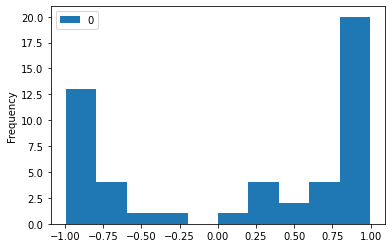

In [17]:
#histogram of the compound polarity scores
data_df.plot(kind='hist')

analysis fluff

next section on positive scores

In [18]:
#looking at only polarity scores labeled as "positive"
grouped = imdb_df.groupby(imdb_df.sentiment)

positive = grouped.get_group("positive")
positive

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [19]:
k = 0
posdata = []
for index, row in positive.iterrows():
    while k < 50:
        review = positive["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        posdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is 0.9744
Review 4's compound polarity score is 0.9828
Review 5's compound polarity score is 0.9022
Review 6's compound polarity score is 0.9149
Review 7's compound polarity score is 0.6168
Review 8's compound polarity score is 0.3506
Review 9's compound polarity score is 0.6518
Review 10's compound polarity score is 0.5425
Review 11's compound polarity score is 0.7948
Review 12's compound polarity score is 0.954
Review 13's compound polarity score is 0.9962
Review 14's compound polarity score is -0.987
Review 15's compound polarity score is -0.9907
Review 16's compound polarity score is -0.6485
Review 17's compound polarity score is 0.9971
Review 18's compound polarity score is 0.9838
Review 19's compound polarity score is 0.9858
Review 20's compound polarity score is 0.9182
Review 21's compound polarity score is 0.9

<AxesSubplot:ylabel='Frequency'>

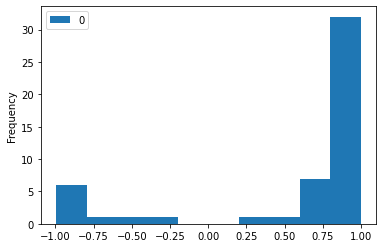

In [20]:
posdata_df = pd.DataFrame(posdata)
posdata_df.plot(kind='hist')

analysis fluff

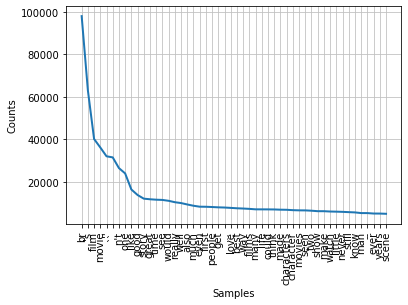

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
positiveFreq.plot(50,cumulative=False)

fluff

stuff about negative section

In [22]:
grouped = imdb_df.groupby(imdb_df.sentiment)

negative = grouped.get_group("negative")
negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [23]:
k = 0
negdata = []
for index, row in negative.iterrows():
    while k < 50:
        review = negative["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        negdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9213
Review 1's compound polarity score is 0.8596
Review 2's compound polarity score is 0.2362
Review 3's compound polarity score is 0.9482
Review 4's compound polarity score is 0.5223
Review 5's compound polarity score is -0.9721
Review 6's compound polarity score is 0.3425
Review 7's compound polarity score is -0.6993
Review 8's compound polarity score is -0.9868
Review 9's compound polarity score is 0.945
Review 10's compound polarity score is -0.9755
Review 11's compound polarity score is 0.899
Review 12's compound polarity score is -0.7602
Review 13's compound polarity score is -0.8481
Review 14's compound polarity score is -0.9208
Review 15's compound polarity score is -0.9604
Review 16's compound polarity score is 0.7133
Review 17's compound polarity score is -0.9399
Review 18's compound polarity score is -0.962
Review 19's compound polarity score is -0.9847
Review 20's compound polarity score is 0.9797
Review 21's compound polarity score

<AxesSubplot:>

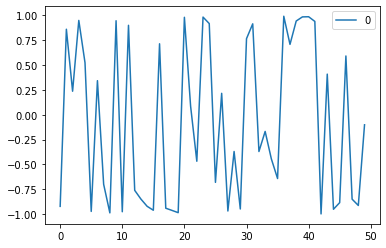

In [24]:
negdata_df = pd.DataFrame(negdata)
negdata_df.plot(kind='line')

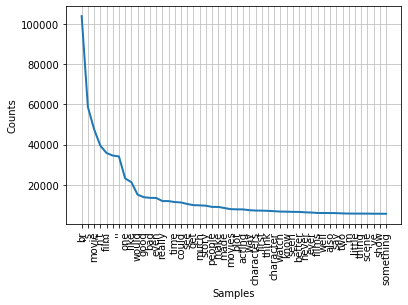

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
negfreq.plot(50,cumulative=False)

In [26]:
posdata_df.mean()

0    0.58517
dtype: float64

In [27]:
negdata_df.mean()

0   -0.076252
dtype: float64

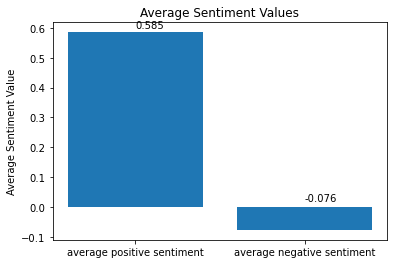

In [28]:
n=1
r = np.arange(n)
width = 0.25

x = [posdata_df.mean()[0], negdata_df.mean()[0]]

ax1 = plt.subplot()
ax1.set_xticks([1,2])

# plt.bar(r, posdata_df.mean(), color = 'b',
#         width = width, edgecolor = 'black',
#         label='average positive sentiment')
# plt.bar(r + width, negdata_df.mean(), color = 'r',
#         width = width, edgecolor = 'black',
#         label='average negative sentiment')
plt.bar([1,2], x)

ax1.set_xticklabels(['average positive sentiment', 'average negative sentiment'])
plt.ylabel("Average Sentiment Value")
  
plt.title("Average Sentiment Values")  
plt.text(1, 0.6, str(round(x[0], 3)))
plt.text(2, 0.02, str(round(x[1], 3)))
  
plt.show()

words here

In [29]:
k = 0
posdata = []
for index, row in positive.iterrows():
    while k < 50:
        review = positive["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        posdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is 0.9744
Review 4's compound polarity score is 0.9828
Review 5's compound polarity score is 0.9022
Review 6's compound polarity score is 0.9149
Review 7's compound polarity score is 0.6168
Review 8's compound polarity score is 0.3506
Review 9's compound polarity score is 0.6518
Review 10's compound polarity score is 0.5425
Review 11's compound polarity score is 0.7948
Review 12's compound polarity score is 0.954
Review 13's compound polarity score is 0.9962
Review 14's compound polarity score is -0.987
Review 15's compound polarity score is -0.9907
Review 16's compound polarity score is -0.6485
Review 17's compound polarity score is 0.9971
Review 18's compound polarity score is 0.9838
Review 19's compound polarity score is 0.9858
Review 20's compound polarity score is 0.9182
Review 21's compound polarity score is 0.9

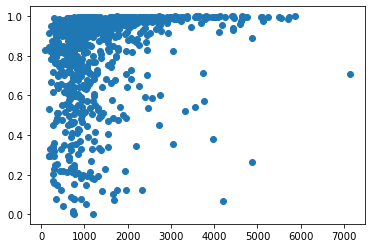

In [32]:
#see how review polarity impacts its length
rlength = []
polarity = []
limit = 1000
for ind in range(len(imdb_df["review"])):
    if ind > limit:
        break
    review = imdb_df["review"][ind]
    rlength.append(len(imdb_df["review"][ind]))
    polarity.append(abs(sia.polarity_scores(review)["compound"]))
    #print(len(imdb_df["review"][ind]))
    #print(abs(sia.polarity_scores(review)["compound"]))

plt.scatter(rlength, polarity)
plt.show()

One of our introductory questions was with regard to how people might be more voluminous depending on strength of sentiment – can we make conclusions about that from the data? 

Yes, the plot above shows review length vs. polarity. Review length is measured in number of words in the x-axis, and polarity is measured as an absolute value in the y-axis. As we can see, very long reviews generally have very high polarity scores, regardless of whether the scores are negative or positive. However, some short reviews are also highly polar, and exhibit the same high absolute values for their polarity scores. Therefore, although we cannot make an absolute correlation that short reviews are usually not as polar as long reviews, we can definitely see that most of the time, very long reviews show a high polarity score. This make sense intuitively, since most people wouldn't care to take such a large effort in writing long reviews unless they really loved or really hated the movie. 

### Discussion 
(what does your analysis show, what is the big picture, and how are these findings useful?)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis vitae augue justo. In vitae ligula eleifend, accumsan sapien ut, cursus odio. Nunc id tincidunt turpis. Nulla faucibus massa ut ipsum ultricies pulvinar at sodales turpis. Nunc vitae porttitor orci. Praesent a mauris vel felis accumsan euismod ultrices nec risus. Vivamus ligula sapien, blandit in nunc eu, tincidunt posuere quam. Aenean quis venenatis lorem, non tempor purus. Sed sapien velit, scelerisque quis accumsan non, volutpat id odio. In sollicitudin diam a felis volutpat varius. Quisque fermentum augue nisi, sit amet porttitor augue mollis id. Phasellus dictum magna ac tellus molestie, ac dictum dui dapibus.

### Team Member Contributions
If you are working in a group, the end must describe each group member's contribution to
this final project (one sentence each).

#### Crystal Huynh
filler text

#### Larry Qu
filler text

#### Nelson Truong
filler text